face3d.shape (3, 68)


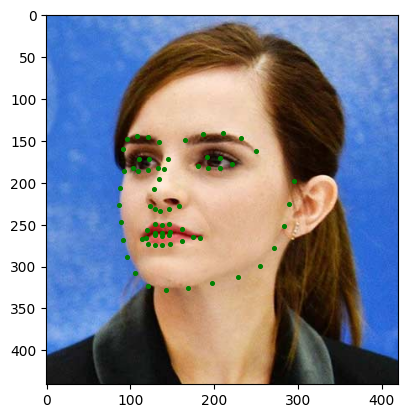

In [453]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, atan2, sqrt
%matplotlib notebook
%matplotlib inline
#notebook 跑不動  改inline

img_name = 'emma_watson'
face2d = np.load(img_name + '.npy')
face2d = face2d.astype('float32')
face3d = np.load('basel_68_pts.npy')
# Do not change the following two lines
face3d[1,:] *= -1
face3d[2,:] *= -1
print('face3d.shape', face3d.shape)

# TODO1: Display the 2D landmarks
# enter your code here 
img = cv2.imread('emma_watson.jpg')# Read image
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB

plt.imshow(img_RGB)#Use plt.imshow() to display the face image.

# Plot 2D landmarks 
#plt.scatter(face2d[0,:], face2d[1,:], c='g')
plt.scatter(face2d[0,:], face2d[1,:], c='g',s=7)#Use plt.plot() to draw the 2D landmarks.
plt.show()

In [454]:
# TODO 2: Pose estimation
# enter your code here
# Step 2.1: Construct the pseudo intrinsic matrix K as below
height, width = img.shape[:2]
f = max(height, width)  #where 𝑓𝑓 is the max of [height, width]
cx = width / 2 #by 講義
cy = height / 2 #by 講義
K = np.array([[f, 0, cx],
              [0, f, cy], 
              [0, 0, 1]])#講義的公式

# Step 2.2: Use below to obtain the extrinsic matrix.
_, rotvec, transvec = cv2.solvePnP(face3d.T, face2d.T, K, None)
rotate,_ = cv2.Rodrigues(rotvec) # You need cv2.Rodrigues() to get the rotation matrix from rotvec

# Step 2.3: Compute Euler angles from rotation matrix
l = sqrt(rotate[0,0]**2 + rotate[0,1]**2)
if l >= 1e-6: #If ℓ ≥ 10−6, pitch = atan2(𝑟𝑟32, 𝑟𝑟33), yaw = atan2(−𝑟𝑟31, ℓ), roll = atan2(𝑟𝑟21, 𝑟𝑟11).
    pitch = atan2(rotate[2,1], rotate[2,2])
    yaw = atan2(-rotate[2,0], l)
    roll = atan2(rotate[0,1], rotate[0,0])
else: #Otherwise, pitch = -atan2(𝑟𝑟23, 𝑟𝑟22), yaw = atan2(−𝑟𝑟31, ℓ), roll = 0
    pitch = -atan2(rotate[1,2], rotate[1,1])
    yaw = atan2(-rotate[2,0], l)
    roll = 0

# convert from radians to degrees,
pitch = pitch * 180 / np.pi
yaw = yaw * 180 / np.pi  
roll = roll * 180 / np.pi

print(f"Pitch: {pitch:.2f} degrees")
print(f"Yaw: {yaw:.2f} degrees")  
print(f"Roll: {roll:.2f} degrees")

Pitch: -2.61 degrees
Yaw: 14.32 degrees
Roll: -4.50 degrees


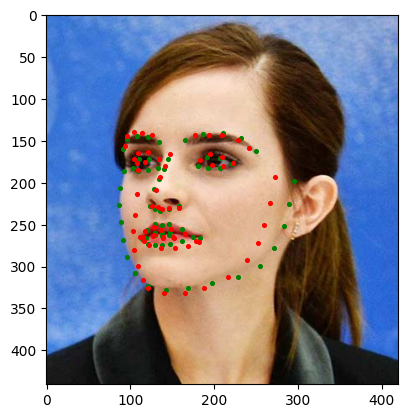

In [455]:
# TODO 3: Compute the reprojected 2D landmarks, face2d_repr
# enter your code here
# Get rotation matrix and translation vector from todo2
R = rotate
t = transvec


face2d_repr = np.zeros((2, 68))
Mi = np.vstack((face3d, np.ones(68)))
mm = K @ np.hstack((R, t )) @ Mi
mm = mm / mm[2]
face2d_repr[0] = mm[0]
face2d_repr[1] = mm[1]
#從assignment1 todo3 copy過來的



# Plot original 2D points (green) and reprojected points (red)

plt.imshow(img_RGB)
plt.scatter(face2d[0,:], face2d[1,:], c='g', s=7)
plt.scatter(face2d_repr[0,:], face2d_repr[1,:], c='r', s=7)


plt.show()

In [456]:
# TODO 4: Print the reprojection error
# enter your code here

n = face2d.shape[1]  # 點的數量
reprojection_error = np.sum(np.sqrt((face2d[0,:] - face2d_repr[0,:])**2 + (face2d[1,:] - face2d_repr[1,:])**2)) / n #講義的公式

print(f"Reprojection Error: {reprojection_error:.2f}")

Reprojection Error: 8.26


Pitch: -7.45 degrees
Yaw: 17.12 degrees
Roll: -3.57 degrees
Reprojection Error: 3.17


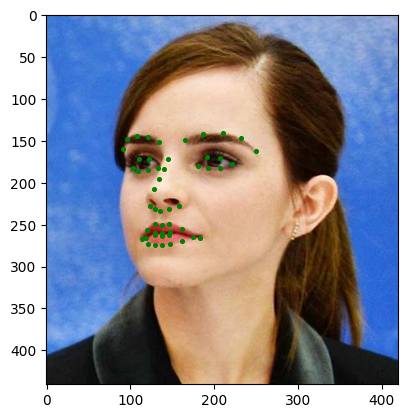

In [457]:
# TODO 5: Repeat TODO 2 ~ TODO 4 using 51 landmarks
# enter your code here

face2d_51 = face2d[:, 17:68]
face3d_51 = face3d[:, 17:68]
#沒有 face counter 是18~68
#https://www.researchgate.net/figure/The-68-and-51-points-mark-up-used-for-provided-annota-tions_fig2_262309544



_, rotvec, transvec = cv2.solvePnP(face3d_51.T, face2d_51.T, K, None)
rotate,_ = cv2.Rodrigues(rotvec) # You need cv2.Rodrigues() to get the rotation matrix from rotvec

# Step 2.3: Compute Euler angles from rotation matrix
l = sqrt(rotate[0,0]**2 + rotate[0,1]**2)
if l >= 1e-6: #If ℓ ≥ 10−6, pitch = atan2(𝑟𝑟32, 𝑟𝑟33), yaw = atan2(−𝑟𝑟31, ℓ), roll = atan2(𝑟𝑟21, 𝑟𝑟11).
    pitch = atan2(rotate[2,1], rotate[2,2])
    yaw = atan2(-rotate[2,0], l)
    roll = atan2(rotate[0,1], rotate[0,0])
else: #Otherwise, pitch = -atan2(𝑟𝑟23, 𝑟𝑟22), yaw = atan2(−𝑟𝑟31, ℓ), roll = 0
    pitch = -atan2(rotate[1,2], rotate[1,1])
    yaw = atan2(-rotate[2,0], l)
    roll = 0

# convert from radians to degrees,
pitch = pitch * 180 / np.pi
yaw = yaw * 180 / np.pi  
roll = roll * 180 / np.pi

print(f"Pitch: {pitch:.2f} degrees")
print(f"Yaw: {yaw:.2f} degrees")  
print(f"Roll: {roll:.2f} degrees")

R = rotate
t = transvec


face2d_repr = np.zeros((2, 51))
Mi = np.vstack((face3d_51, np.ones(51)))
mm = K @ np.hstack((R, t )) @ Mi
mm = mm / mm[2]
face2d_repr[0] = mm[0]
face2d_repr[1] = mm[1]
#從assignment1 todo3 copy過來的



# Plot original 2D points (green) and reprojected points (red)

plt.imshow(img_RGB)
plt.scatter(face2d_51[0,:], face2d_51[1,:], c='g', s=7)
#plt.scatter(face2d_repr[0,:], face2d_repr[1,:], c='r', s=7)
n = face2d.shape[1]  # 點的數量
reprojection_error = np.sum(np.sqrt((face2d_51[0,:] - face2d_repr[0,:])**2 + (face2d_51[1,:] - face2d_repr[1,:])**2)) / n #講義的公式

print(f"Reprojection Error: {reprojection_error:.2f}")


In [458]:
# Question 1: Which is better to perform pose estimation, using 68 points or using 51 points? 
# enter your answer here
#如果是以 Reprojection Error 去判斷的話  很明顯 51點的error比68點小很多。

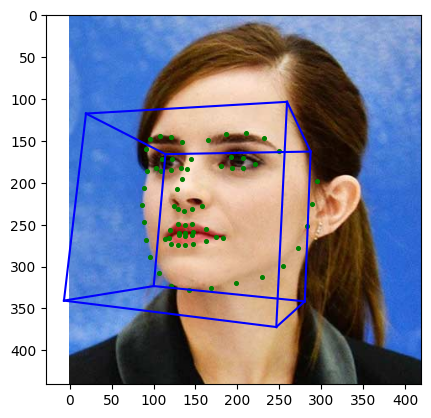

In [459]:
# TODO 6: Augmented reality
# enter your code here

x_min = np.min(face3d[0, :]) - 1
x_max = np.max(face3d[0, :]) + 1
y_min = np.min(face3d[1, :]) - 1
y_max = np.max(face3d[1, :]) + 1
z_min = np.min(face3d[2, :]) - 1
z_max = np.max(face3d[2, :]) + 1
cube = np.array([[x_min, y_min, z_min], [x_max, y_min, z_min], [x_max, y_max, z_min], [x_min, y_max, z_min],
                  [x_min, y_min, z_max], [x_max, y_min, z_max], [x_max, y_max, z_max], [x_min, y_max, z_max]]) #copy by assignment1 todo5

#copy from todo 3
cube_2d = np.zeros((2, 8))
Mi = np.vstack((cube.T, np.ones(8)))
mm = K @ np.hstack((R, t)) @ Mi
mm = mm / mm[2]
cube_2d[0] = mm[0]
cube_2d[1] = mm[1]

plt.imshow(img_RGB)
plt.scatter(face2d[0, :], face2d[1, :], c='g', s=7)  


cube_edges = [[0, 1], [1, 2], [2, 3], [3, 0], [4, 5], [5, 6], [6, 7], [7, 4], [0, 4], [1, 5], [2, 6], [3, 7]]
for edge in cube_edges:
    p1 = cube_2d[:, edge[0]]
    p2 = cube_2d[:, edge[1]]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b-') 

plt.show()